In [1]:
import pandas as pd

df = pd.read_csv('c:/data/text/ratings.csv', encoding='utf-8')
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1.0
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1.0
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1.0
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1.0
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1.0


1.0    100000
0.0     67568
Name: label, dtype: int64


<AxesSubplot:>

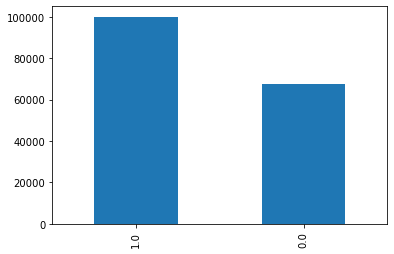

In [2]:
%matplotlib inline
print(df['label'].value_counts()) #긍정:부정 비율 1:1
df['label'].value_counts().plot(kind='bar')

In [3]:
#정규표현식
import re

text = 'I am a boy.#,:;!$! 1234 소년이다.'
re.sub('[^a-zA-Z ]', '', text) #알파벳과 공백을 제외하고 모두 제거

'I am a boy  '

In [4]:
#한글과 공백을 제외하고 모두제거
df['document'] = df['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
df[:5]

<ipython-input-4-60264f8739bd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1.0
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1.0
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1.0
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1.0
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1.0


In [5]:
import numpy as np
#빈문자열을 np.nan으로 바꾸고 inplace=True 기존 데이터프레임의 내용을 대체함
df['document'].replace('', np.nan, inplace=True)
print(df.isnull().sum()) #결측값의 개수 확인

id            0
document    883
label         1
dtype: int64


In [6]:
df.loc[df.document.isnull()][:5] #결측값 5개

,id,document,label
203,10216462,NaN,1.0
984,5338464,NaN,1.0
1199,7887700,NaN,1.0
1346,9317820,NaN,1.0
1520,6857895,NaN,1.0


In [7]:
print(len(df))
df = df.dropna(how = 'any') #결측값이 있는 행 제거
print(len(df))

167569
166685


In [8]:
X = df[['document']]
y = df['label']
print(X[:3])
print(y[:3])

                                            document
0                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1  디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...
2                   폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고
0    1.0
1    1.0
2    1.0
Name: label, dtype: float64


In [9]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=['document'])
y_samp = pd.DataFrame(data=y_sample, columns=['label'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [10]:
df_samp['label'].value_counts()

0.0    67174
1.0    67174
Name: label, dtype: int64

In [11]:
#불용어
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를',
'으로', '자', '에', '와', '한', '하다']

In [12]:
from konlpy.tag import Okt

okt = Okt()
#토큰화, stem 어근화
okt.morphs('아버지가 방에 들어가신다', stem=True)

['아버지', '가', '방', '에', '들어가다']

In [15]:
## 예상오류지점
X = []
y = []
#1000행만 실습
for idx, sentence in enumerate(df['document'][:1000]):
    temp = []
    temp = okt.morphs(sentence, stem=True)
    #print(temp)
    #불용어가 아닌 단어들의 목록
    temp = [word for word in temp if not word in stopwords]
    #print(temp)
    X.append(temp)
    y.append(df.iloc[idx, 2]) #0,1 값을 리스트에 추가

In [16]:
y

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [17]:
print(X[:3])
print(y[:3])

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]
[1.0, 1.0, 1.0]


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
#단어 집합을 만들고 단어에 고유한 숫자 인덱스를 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [19]:
i=0
for word in list(tokenizer.word_index.keys()):
    print(word, '==>', tokenizer.word_index[word])
    i += 1
    if i>5: break

영화 ==> 1
보다 ==> 2
을 ==> 3
좋다 ==> 4
있다 ==> 5
재밌다 ==> 6


In [20]:
threshold = 3
total_cnt = len(tokenizer.word_index) #단어의 수
rare_cnt = 0 #출현 빈도수가 threshold 보다 작은 단어의 개수
total_freq = 0 #X 데이터의 전체 단어 빈도수 총합
rare_freq = 0 # 출현빈도수가 threshold보다 작은 단어의 출현빈도의 총합

#단어와 빈도수의 pair
for key, value in tokenizer.word_counts.items():
    total_freq += value

    #단어의 출현빈도수가 threshold보다 작으면
    if value < threshold:
        rare_cnt += 1
        rare_freq += value

print('단어 집합(vocalbulary)의 크기 :', total_cnt)
print('출현 빈도가 %s번 이하인 희귀 단어의 수: %s' %(threshold -1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt / total_cnt)*100)

단어 집합(vocalbulary)의 크기 : 3015
출현 빈도가 2번 이하인 희귀 단어의 수: 2304
단어 집합에서 희귀 단어의 비율: 76.4179104477612


In [21]:
vocab_size = total_cnt - rare_cnt + 1 #전체 단어 개수 중 빈도수 2이하인 희귀 단어 제거
print('단어 집합의 크기: ', vocab_size)

단어 집합의 크기:  712


In [22]:
tokenizer = Tokenizer(vocab_size) #상위 단어 개수 지정
tokenizer.fit_on_texts(X)

i = 0
for word in list(tokenizer.word_index.keys()):
    print(word, '==>', tokenizer.word_index[word])
    i += 1
    if i > 5: break

영화 ==> 1
보다 ==> 2
을 ==> 3
좋다 ==> 4
있다 ==> 5
재밌다 ==> 6


In [23]:
#텍스트를 시퀀스로 변환
X2 = tokenizer.texts_to_sequences(X) #단어의 인덱스로만 구성된 새로운 리스트
print(X[:3]) #실제 단어
print(X2[:3]) #단어의 인덱스

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]
[[111, 30, 33, 45, 36, 2, 6, 27], [3, 198, 18, 490, 3, 307, 491, 384, 492, 267, 268, 18, 224, 225, 226, 49, 493, 3, 385, 13, 490, 5, 64, 13, 40, 3, 386, 387, 31, 5, 29, 494], [199, 112, 49, 141, 59, 14, 10]]


In [24]:
for index, sentence in enumerate(X2[:10]):
    print(index, sentence)

0 [111, 30, 33, 45, 36, 2, 6, 27]
1 [3, 198, 18, 490, 3, 307, 491, 384, 492, 267, 268, 18, 224, 225, 226, 49, 493, 3, 385, 13, 490, 5, 64, 13, 40, 3, 386, 387, 31, 5, 29, 494]
2 [199, 112, 49, 141, 59, 14, 10]
3 [71, 15, 16, 200, 142, 20, 308, 2, 99, 84, 16, 1, 162]
4 [309, 5, 13, 1]
5 [53, 3, 310, 40, 311, 143, 112, 226, 49, 163, 5, 1]
6 [65, 17, 7, 36, 2, 17]
7 [200, 227, 32, 32, 21, 33, 92]
8 [100]
9 [43, 7]


In [25]:
#단어가 하나도 없는 문장들을 제거하기 위한 리스트
drop_X = [index for index, sentence in enumerate(X2) if len(sentence) < 1]
drop_X[:10]

[66, 76, 103, 106, 111, 120, 128, 169, 190, 258]

In [26]:
#단어가 하나도 없는 문장들을 제거
X_test = np.delete(X, drop_X, axis=0)
X = np.delete(X2, drop_X, axis=0)
y = np.delete(y, drop_X, axis=0)
print(X.shape)
print(y.shape)

(980,)
(980,)


C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 37
리뷰의 평균 길이 : 7.557142857142857


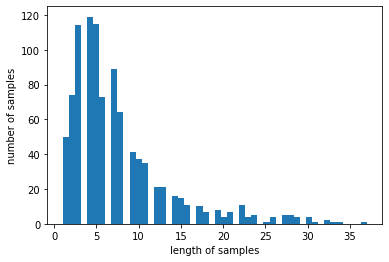

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
max_len = max(len(l) for l in X)
print('리뷰의 최대 길이 :', max_len)
print('리뷰의 평균 길이 :', sum(map(len, X))/len(X))
plt.hist([len(s) for s in X], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#최대 사이즈에 맞추어 빈칸에 0으로 채움
X = pad_sequences(X, maxlen=max_len)
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 111,  30,  33,  45,  36,   2,   6,  27])

In [30]:
print(X.shape)
print(y.shape)

(980, 37)
(980,)


In [31]:
#학습용: 검증용 8:2로 구분
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test.shape)

(784, 37)
(196, 37)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [33]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 100))
#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 128로 설정
model.add(LSTM(128))
#출력층
model.add(Dense(1, activation='sigmoid', name='output'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
hist = model.fit(X_train, y_train, epochs=15, batch_size=60, validation_split=0.2)

Epoch 1/15
11/11 [==============================] - 3s 57ms/step - loss: 0.1913 - accuracy: 0.9107 - val_loss: 4.7425e-04 - val_accuracy: 1.0000
Epoch 2/15
11/11 [==============================] - 0s 21ms/step - loss: 2.9929e-04 - accuracy: 1.0000 - val_loss: 1.6537e-04 - val_accuracy: 1.0000
Epoch 3/15
11/11 [==============================] - 0s 13ms/step - loss: 1.2355e-04 - accuracy: 1.0000 - val_loss: 8.3969e-05 - val_accuracy: 1.0000
Epoch 4/15
11/11 [==============================] - 0s 11ms/step - loss: 6.7309e-05 - accuracy: 1.0000 - val_loss: 4.9659e-05 - val_accuracy: 1.0000
Epoch 5/15
11/11 [==============================] - 0s 10ms/step - loss: 4.0913e-05 - accuracy: 1.0000 - val_loss: 3.1209e-05 - val_accuracy: 1.0000
Epoch 6/15
11/11 [==============================] - 0s 10ms/step - loss: 2.6036e-05 - accuracy: 1.0000 - val_loss: 2.0168e-05 - val_accuracy: 1.0000
Epoch 7/15
11/11 [==============================] - 0s 11ms/step - loss: 1.6901e-05 - accuracy: 1.0000 - val_l

In [35]:
scores = model.evaluate(X_test, y_test[:X_test.shape[0]], verbose=0)
print(scores)

[4.51570400628043e-07, 1.0]


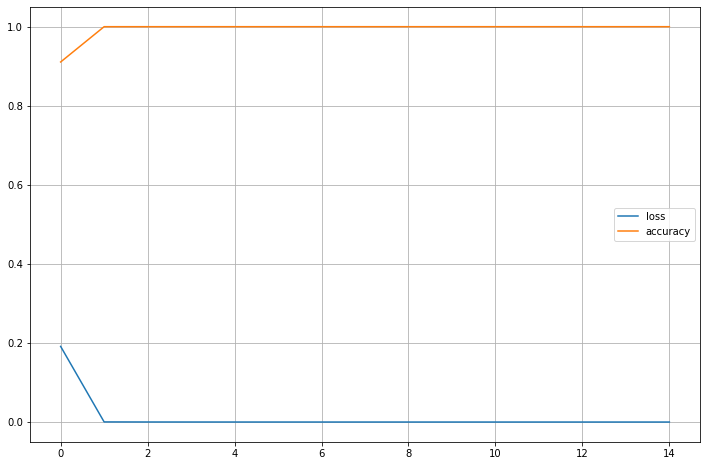

In [36]:
#모델의 학습과정
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()